# Dirty Data Wrangling Challenge

### Cleaner 1.0

La función de este cuaderno, será limpiar el dataset de *"Indian Food"*.

El proceso de *cleaning* consta de solucionar los siguientes 10 errores:

1. Missing data

2. Duplicated rows

3. Outliers

4. Format inconsistencies

5. Typographical errors

6. Extra categories

7. Incorrect data types

8. No default codification of file

9. Incorrect headers

10. Extra punctuation symbols

Después de solucionar los errores anteriores, haremos un análisis del dataset.

In [70]:
import pandas as pd
import numpy as np

clean_df = pd.read_csv('recieved_dirty_dataset.csv')
display(clean_df.head())

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,ingrediente_especial,random_noise
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,30,25,sweet,dessert,0,East,123
1,Boondi,"Gram flour, ghee, sugar",vegetarian,45 min,30,sweet,dessert,1,West,456
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,one hour,999999,sweet,dessert,2,North,baz
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,60,30,sweet,dessert,1,West,456
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,forty-five,40,sweet,dessert,0,East,456


### 2. Inspección inicial

In [71]:
display("Tipos de datos:")
display(clean_df.dtypes)

display("Valores nulos por columna:")
display(clean_df.isnull().sum())

display("Duplicados exactos:")
display(clean_df[clean_df.duplicated()])

'Tipos de datos:'

name                    object
ingredients             object
diet                    object
prep_time               object
cook_time                int64
flavor_profile          object
course                  object
state                    int64
ingrediente_especial    object
random_noise            object
dtype: object

'Valores nulos por columna:'

name                    0
ingredients             0
diet                    0
prep_time               0
cook_time               0
flavor_profile          0
course                  0
state                   0
ingrediente_especial    1
random_noise            0
dtype: int64

'Duplicados exactos:'

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,ingrediente_especial,random_noise
261,Puri Bhaji,"Aloo, urad dal, mustard, ginger, curry leaves",vegetarian,10,30,spicy,main course,6,West,baz
265,Dalithoy,"Arhar dal, coconut oil, curry leaves, mustard ...",vegetarian,5,20,-1,main course,6,West,foo
269,Keerai poriyal,"Amaranth leaves, split urad dal, mustard seeds...",vegetarian,20,30,spicy,main course,14,South,123
290,Ledikeni,"Chhena, sugar, ghee",vegetarian,45,45,sweet,dessert,0,East,baz
291,Dal tadka,"Pigeon peas, garam masala, ginger, red onion, ...",vegetarian,10,30,spicy,main course,2,North,foo
292,Sohan halwa,"Corn flour, ghee, dry fruits",unknown,10,60,sweet,dessert,3,North,foo


### 3. Limpiar columnas numéricas
Función para convertir tiempos a minutos con manejo de horas y manejo de strings numéricos. Luego identificamos los outliers.

In [72]:
def convert_to_minutes(x):
    if pd.isnull(x) or x == '':
        return np.nan
    if isinstance(x, (int, float)):
        return x
    x_str = str(x).lower()
    if 'hour' in x_str:
        try:
            num = int(''.join(filter(str.isdigit, x_str)))
            return num * 60
        except:
            return np.nan
    try:
        return int(''.join(filter(str.isdigit, x_str)))
    except:
        return np.nan

clean_df['prep_time'] = clean_df['prep_time'].apply(convert_to_minutes)
clean_df['cook_time'] = clean_df['cook_time'].apply(convert_to_minutes)

clean_df['prep_time'] = clean_df['prep_time'].apply(lambda x: None if x > 1000 else x)
clean_df['cook_time'] = clean_df['cook_time'].apply(lambda x: None if x > 1000 else x)

### 4. Limpiar columnas categóricas

Normalizar texto a minúsculas, eliminar espacios y corregir errores de tipeo conocidos

In [73]:

clean_df['flavor_profile'] = clean_df['flavor_profile'].str.lower().str.strip()
clean_df['diet'] = clean_df['diet'].str.lower().str.strip()
clean_df['course'] = clean_df['course'].str.lower().str.strip()

clean_df['flavor_profile'] = clean_df['flavor_profile'].replace({
    'sweet': 'sweet',
    'sweett': 'sweet',
    'sWeet': 'sweet',
    '-1': 'unknown',
    '': 'unknown'
})
clean_df['diet'] = clean_df['diet'].replace({'non vegetarian':'non_vegetarian'})

### 5. Manejar duplicados

In [74]:
clean_df = clean_df.drop_duplicates()
clean_df.reset_index(drop=True, inplace=True)

### 6. Manejar valores faltantes

Rellenar valores numéricos con la mediana y rellenar categóricas con "unknown"

In [75]:
clean_df['prep_time'].fillna(clean_df['prep_time'].median(), inplace=True)
clean_df['cook_time'].fillna(clean_df['cook_time'].median(), inplace=True)

clean_df['flavor_profile'].fillna('unknown', inplace=True)
clean_df['course'].fillna('unknown', inplace=True)
clean_df['diet'].fillna('unknown', inplace=True)

### 7. Renombrar columna

Cambiamos la columna "ingrediente_espacial" por el nombre "region" que es a lo que se refiere la columna.

In [76]:
clean_df.rename(columns={'ingrediente_especial': 'region'}, inplace=True)

# 8. Controlar datos o deseados en columnas categóricas

- Eliminar columna random noise
- Eliminar filas con '-1' o 'unknown' en columnas categóricas

Luego se reinicia el índice para guardar el dataset

In [77]:

if 'random_noise' in clean_df.columns:
    clean_df.drop(columns=['random_noise'], inplace=True)

categorical_cols = ['diet', 'course', 'flavor_profile', 'region']
for col in categorical_cols:
    clean_df = clean_df[~clean_df[col].isin(['-1', 'unknown'])]

clean_df.reset_index(drop=True, inplace=True)

### 7. Revisar resultados

In [78]:
display("Dataset limpio:")
display(clean_df.head())

display("Tipos de datos finales:")
display(clean_df.dtypes)

display("Valores nulos por columna:")
display(clean_df.isnull().sum())

'Dataset limpio:'

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,30.0,25.0,sweet,dessert,0,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,45.0,30.0,sweet,dessert,1,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,10.0,30.0,sweet,dessert,2,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,60.0,30.0,sweet,dessert,1,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,10.0,40.0,sweet,dessert,0,East


'Tipos de datos finales:'

name               object
ingredients        object
diet               object
prep_time         float64
cook_time         float64
flavor_profile     object
course             object
state               int64
region             object
dtype: object

'Valores nulos por columna:'

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

### 8. Guardar dataset limpio

In [79]:
clean_df.to_csv('clean_dataset.csv', index=False, encoding='utf-8')
del clean_df

## Parte 2. Análisis

### 1. Información general del dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_dataset.csv")
display(df.head())

display("\nInformación general:")
display(df.info())

display("\nDescripción estadística de columnas numéricas:")
display(df.describe())

display("\nNúmero de valores únicos por columna:")
display(df.nunique())

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,30.0,25.0,sweet,dessert,0,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,45.0,30.0,sweet,dessert,1,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,10.0,30.0,sweet,dessert,2,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,60.0,30.0,sweet,dessert,1,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,10.0,40.0,sweet,dessert,0,East


### 2. Análisis de columnas numéricas

Boxplots para identificar outliers

'Columnas numéricas:'

['prep_time', 'cook_time', 'state']

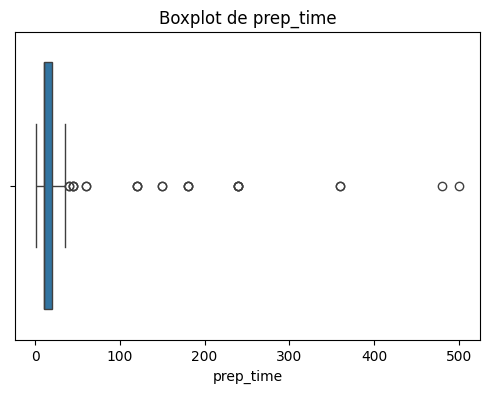

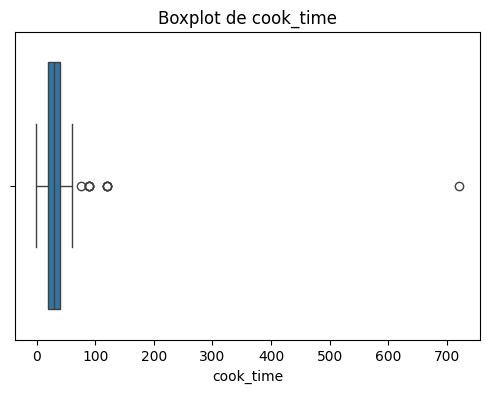

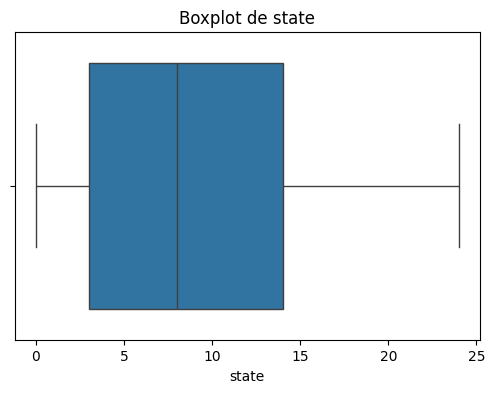

In [ ]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
display("Columnas numéricas:", numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

### 3. Análisis de columnas categóricas

Frecuencia de cada categoría

'Columnas categóricas:'

['diet', 'flavor_profile', 'course', 'region']

'Frecuencia de valores en diet:'

diet
vegetarian        183
non_vegetarian     24
Name: count, dtype: int64

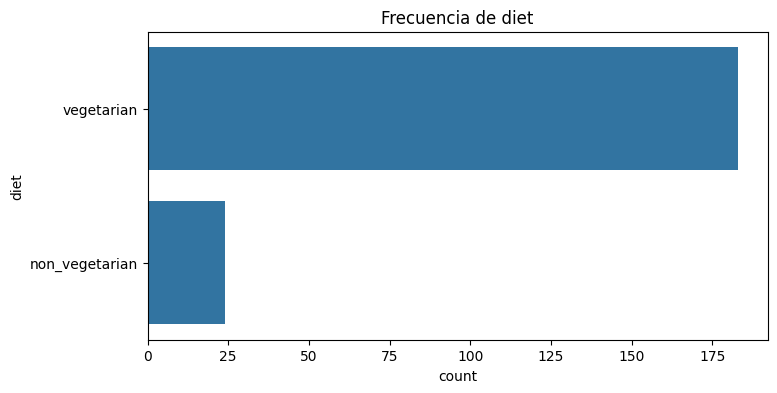

'Frecuencia de valores en flavor_profile:'

flavor_profile
spicy     114
sweet      88
bitter      3
sour        2
Name: count, dtype: int64

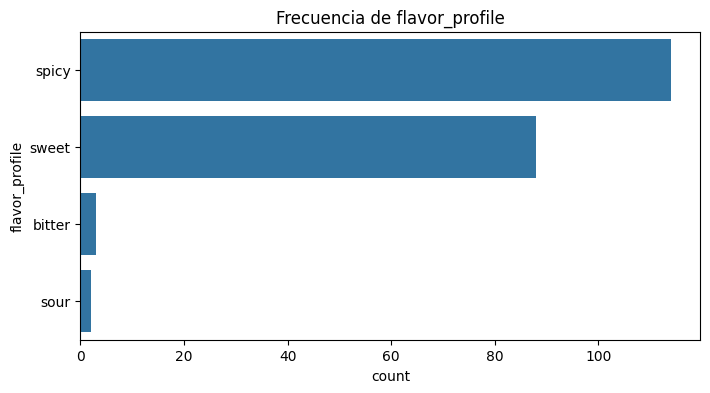

'Frecuencia de valores en course:'

course
main course    92
dessert        84
snack          30
starter         1
Name: count, dtype: int64

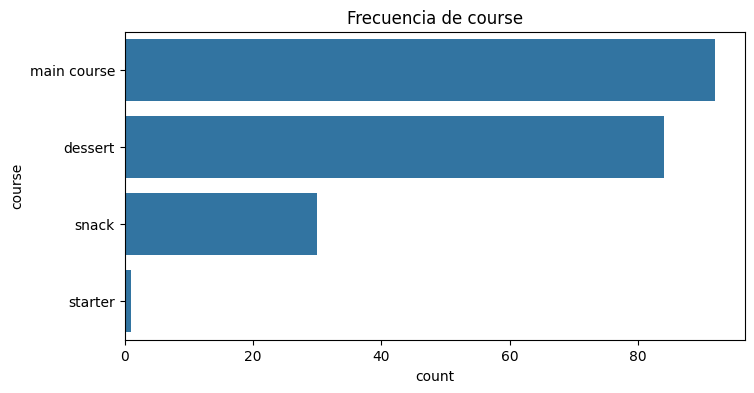

'Frecuencia de valores en region:'

region
West          69
South         47
North         42
East          25
North East    21
Central        2
Name: count, dtype: int64

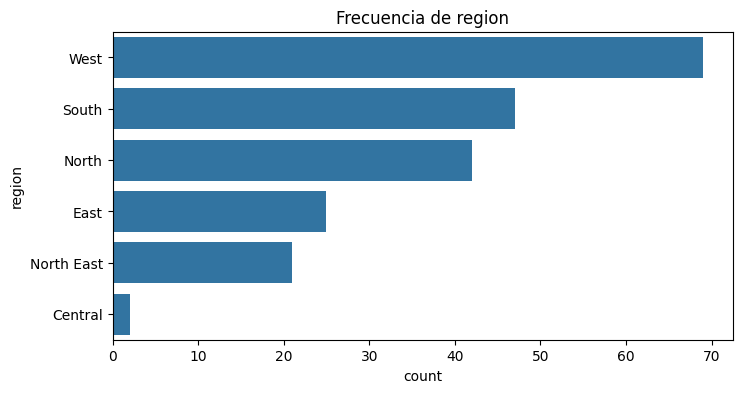

In [ ]:
categorical_cols = ['diet', 'flavor_profile', 'course', 'region']
display("Columnas categóricas:", categorical_cols)

for col in categorical_cols:
    display(f"Frecuencia de valores en {col}:")
    display(df[col].value_counts())

    plt.figure(figsize=(8,4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Frecuencia de {col}")
    plt.show()

### 4. Relación entre variables numéricas y categóricas

Por ejemplo: prep_time promedio por diet

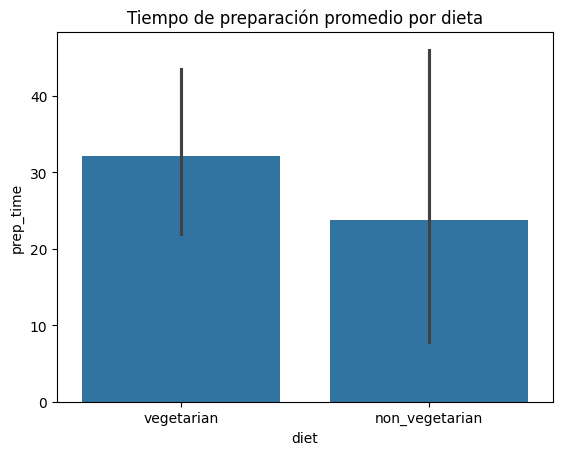

In [ ]:
sns.barplot(x='diet', y='prep_time', data=df)
plt.title("Tiempo de preparación promedio por dieta")
plt.show()

### 5. Correlaciones entre variables numéricas


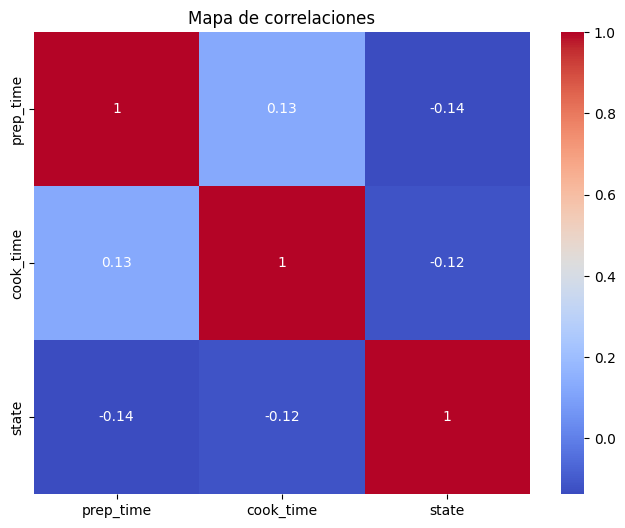

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()